In [47]:
# import data
import pandas as pd
import numpy as np

In [48]:
# open and read the CSV file
filepath = 'dataset/loan_train.csv'
data = pd.read_csv(filepath)

# display data head
data.head()



,Gender,Married,Dependents,Education,Self_Employed,Applicant_Income,Coapplicant_Income,Loan_Amount,Term,Credit_History,Area,Status
0,Male,No,0,Graduate,No,584900,0.0,15000000,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,458300,150800.0,12800000,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,300000,0.0,6600000,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,258300,235800.0,12000000,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,600000,0.0,14100000,360.0,1.0,Urban,Y


In [49]:
# display data profile
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Gender              601 non-null    object 
 1   Married             611 non-null    object 
 2   Dependents          599 non-null    object 
 3   Education           614 non-null    object 
 4   Self_Employed       582 non-null    object 
 5   Applicant_Income    614 non-null    int64  
 6   Coapplicant_Income  614 non-null    float64
 7   Loan_Amount         614 non-null    int64  
 8   Term                600 non-null    float64
 9   Credit_History      564 non-null    float64
 10  Area                614 non-null    object 
 11  Status              614 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 57.7+ KB


### Handling missing values

In [50]:
# handle missing values
data.isnull().sum()

# remove rows with missing values
cleaned_data = data.dropna()

# display cleaned data info
cleaned_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 499 entries, 0 to 613
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Gender              499 non-null    object 
 1   Married             499 non-null    object 
 2   Dependents          499 non-null    object 
 3   Education           499 non-null    object 
 4   Self_Employed       499 non-null    object 
 5   Applicant_Income    499 non-null    int64  
 6   Coapplicant_Income  499 non-null    float64
 7   Loan_Amount         499 non-null    int64  
 8   Term                499 non-null    float64
 9   Credit_History      499 non-null    float64
 10  Area                499 non-null    object 
 11  Status              499 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 50.7+ KB


In [51]:
# display cleaned data head
cleaned_data.head()

,Gender,Married,Dependents,Education,Self_Employed,Applicant_Income,Coapplicant_Income,Loan_Amount,Term,Credit_History,Area,Status
0,Male,No,0,Graduate,No,584900,0.0,15000000,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,458300,150800.0,12800000,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,300000,0.0,6600000,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,258300,235800.0,12000000,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,600000,0.0,14100000,360.0,1.0,Urban,Y


In [57]:
# number of records removed
removed_records = data.shape[0] - cleaned_data.shape[0]
print(f'Number of records removed: {removed_records}')

Number of records removed: 115


### Transformations

1. Convert Dependents values to numeric

In [53]:
import random
# convert Dependents to numeric
cleaned_data['Dependents'] = cleaned_data['Dependents'].astype(str).replace('3+', random.choice(['3', '4', '5'])).astype(int)
cleaned_data.info()


<class 'pandas.core.frame.DataFrame'>
Index: 499 entries, 0 to 613
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Gender              499 non-null    object 
 1   Married             499 non-null    object 
 2   Dependents          499 non-null    int64  
 3   Education           499 non-null    object 
 4   Self_Employed       499 non-null    object 
 5   Applicant_Income    499 non-null    int64  
 6   Coapplicant_Income  499 non-null    float64
 7   Loan_Amount         499 non-null    int64  
 8   Term                499 non-null    float64
 9   Credit_History      499 non-null    float64
 10  Area                499 non-null    object 
 11  Status              499 non-null    object 
dtypes: float64(3), int64(3), object(6)
memory usage: 50.7+ KB


C:\Users\samuelitwaru\AppData\Local\Temp\ipykernel_30752\4218061118.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_data['Dependents'] = cleaned_data['Dependents'].astype(str).replace('3+', random.choice(['3', '4', '5'])).astype(int)


2. Add ID column

In [54]:
# add ID column as the first column with values as a range from 1 to the length of the dataframe
cleaned_data.insert(0, 'ID', range(1, 1 + len(cleaned_data)))

### Handling Outliers

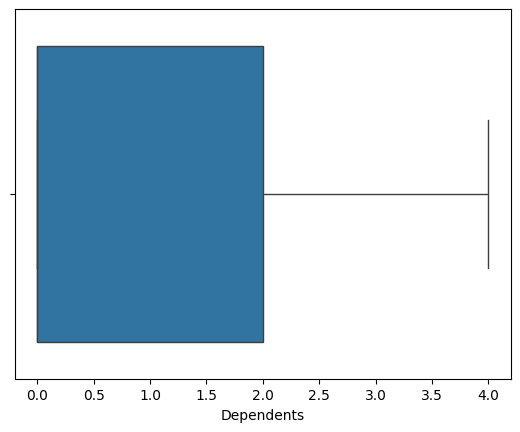

Number of outliers in Dependents: 0


In [55]:
# find outliers in Dependents
import matplotlib.pyplot as plt
import seaborn as sns
sns.boxplot(x=cleaned_data['Dependents'])
plt.show()


# count outliers in Dependents
Q1 = cleaned_data['Dependents'].quantile(0.25)
Q3 = cleaned_data['Dependents'].quantile(0.75)
IQR = Q3 - Q1
outliers = cleaned_data[(cleaned_data['Dependents'] < (Q1 - 1.5 * IQR)) | (cleaned_data['Dependents'] > (Q3 + 1.5 * IQR))]
print(f'Number of outliers in Dependents: {outliers.shape[0]}')



### Save Cleaned Data

In [56]:
# save cleaned data
cleaned_data.to_csv('Itwaru.csv', index=False)